# 200. Разминка

Дан обучающий сет с численными признаками. Дополнительно известно, что целевая функция $f: R^{100}->R$ линейная и гарантированно зависит от всех признаков.

Требуется найти целевую функцию.

Решение будет зачтено, если абсолютная ошибка на каждом примере не превышает $10^{-8}$.

**Формат ввода**

Обучающий датасет train.tsv находится в архиве, доступном по адресу.

Формат данных: в каждой строке содержатся значения 100 признаков, 101-е число в каждой строке — значение целевой функции на этом наборе.

Тестовый датасет test.tsv находится в архиве, доступном по адресу.

Формат данных: в каждой строке содержатся значения 100 признаков.

Каждый признак в датасетах, а также значение целевой функции — число с точностью 8 значащих цифр после десятичной точки.

**Формат вывода**

Необходимо предоставить файл answer.tsv, в котором в i-той строке будет записано предсказанное значение функции (число с точностью 8 значащих цифр после десятичной точки) для i-той строки тестового датасета.

In [1]:
import pandas as pd

train = pd.read_table('train.tsv', header=None)
test = pd.read_table('test.tsv', header=None)

train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,5.081360e-03,2.732210e-03,3.976420e-03,0.004540,4.731020e-03,0.005066,0.002552,0.003555,0.003674,4.089900e-03,...,0.005197,1.644370e-03,0.005083,0.004174,0.003957,0.002386,0.004375,8.412300e-04,0.000653,0.284860
1,4.174910e-03,7.084480e-03,2.123510e-03,0.000003,3.681860e-03,0.004573,0.003550,0.008086,0.006227,3.793680e-03,...,0.000264,5.655750e-03,0.006144,0.000177,0.004394,0.001403,0.002766,3.999750e-03,0.008292,0.401233
2,1.175410e-03,1.298870e-03,2.000290e-03,0.004009,3.330520e-03,0.004482,0.000404,0.000320,0.000136,3.351720e-03,...,0.003521,3.148270e-03,0.002726,0.003363,0.003507,0.001631,0.003283,2.215900e-04,0.004203,0.239423
3,5.845890e-03,5.368910e-03,6.507510e-03,0.006121,8.502420e-03,0.008948,0.002689,0.001819,0.000579,1.125160e-03,...,0.006734,5.367000e-05,0.008358,0.003522,0.001091,0.007370,0.002647,6.058580e-03,0.000045,0.491486
4,5.600000e-07,3.700000e-07,6.200000e-07,0.000002,9.700000e-07,0.000002,0.000002,0.000002,0.000002,6.800000e-07,...,0.000002,9.800000e-07,0.000002,0.000002,0.000001,0.000001,0.000001,8.000000e-07,0.000001,0.000112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.126240e-03,8.097750e-03,5.043550e-03,0.003677,1.371790e-03,0.007320,0.004562,0.006942,0.004636,1.822900e-03,...,0.008894,3.485490e-03,0.008391,0.008122,0.000035,0.004138,0.007399,2.965940e-03,0.006786,0.441487
9996,1.258000e-05,3.588800e-03,2.565680e-03,0.004919,1.139530e-03,0.000975,0.004295,0.000375,0.001704,1.078000e-04,...,0.002195,2.007280e-03,0.001027,0.004323,0.003101,0.002623,0.004022,2.837130e-03,0.002792,0.238484
9997,2.114960e-03,1.112993e-02,1.576525e-02,0.013403,7.203590e-03,0.005472,0.011304,0.014350,0.009834,6.558700e-03,...,0.003213,2.703120e-03,0.005990,0.000906,0.007987,0.006741,0.016363,1.119067e-02,0.002250,0.872664
9998,4.023160e-03,2.407500e-04,3.615260e-03,0.001611,7.216200e-04,0.005214,0.003414,0.001010,0.003726,3.416080e-03,...,0.001267,3.230790e-03,0.004396,0.000271,0.000329,0.000163,0.004103,4.440250e-03,0.005700,0.301651


<Axes: >

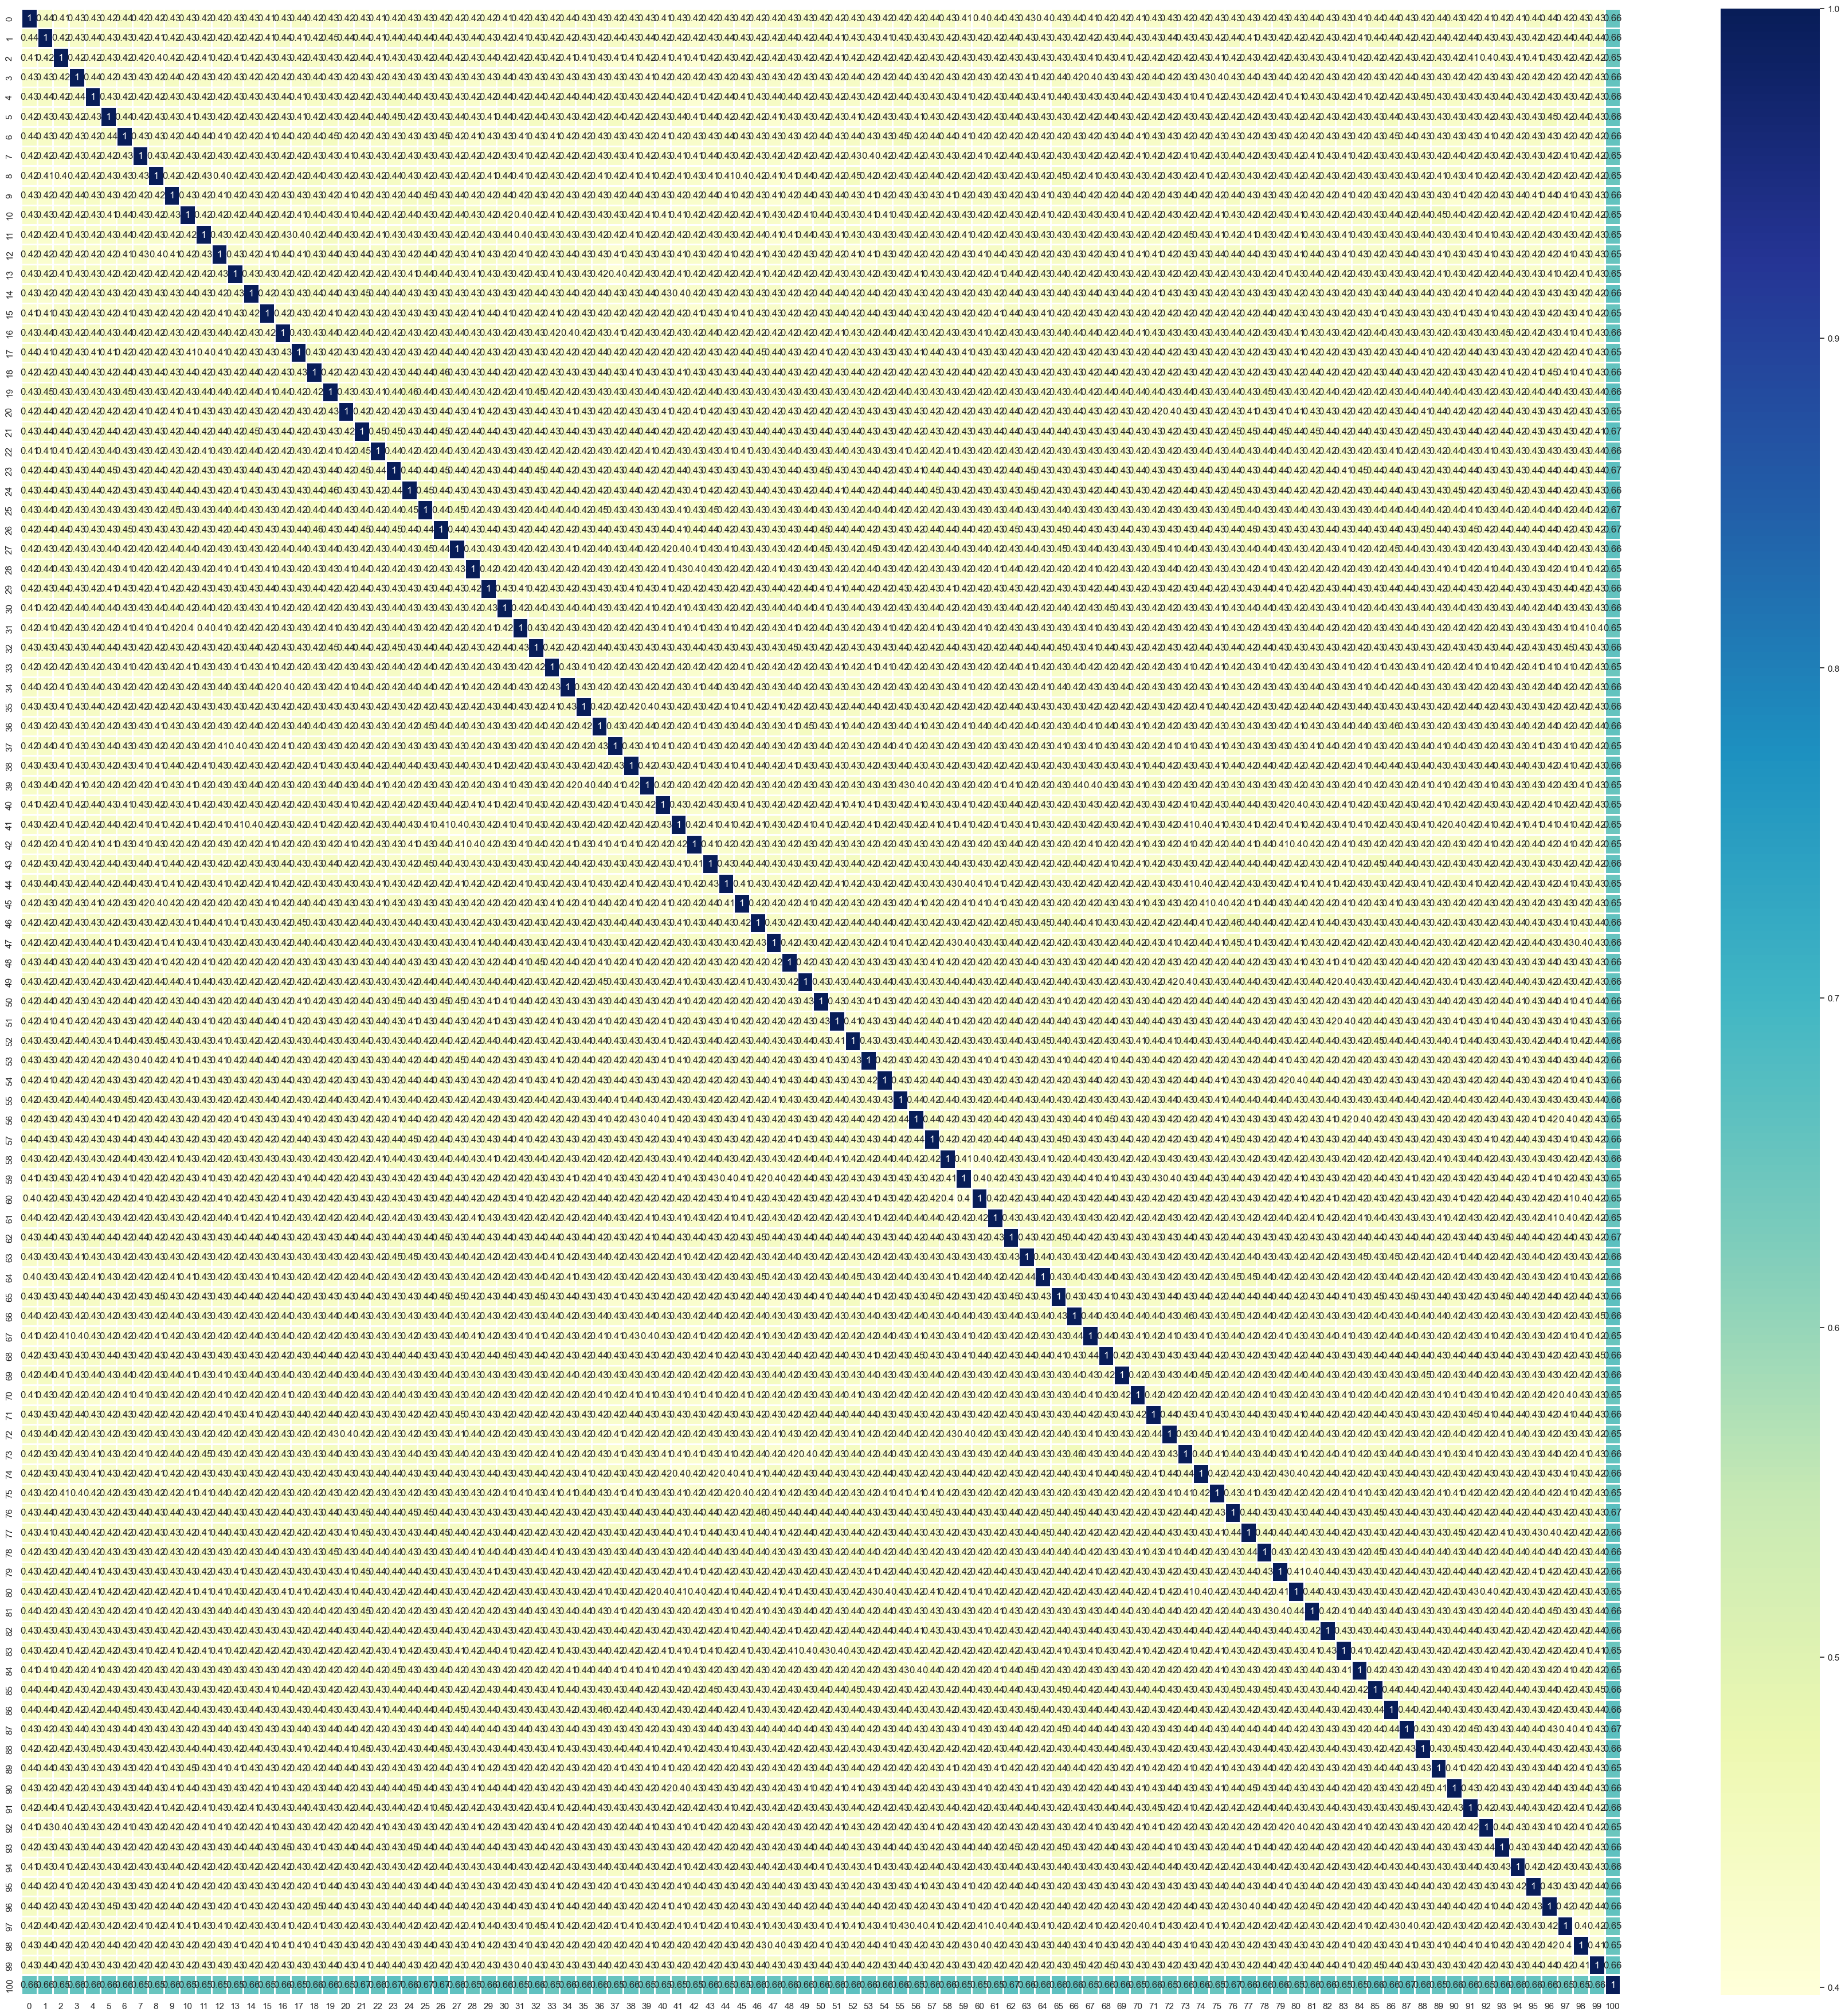

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(45,45)})

sns.heatmap(train.corr(), annot = True, cmap="YlGnBu", linecolor='white',linewidths=1)

In [5]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.model_selection import cross_val_score
import numpy as np

xgb = xgboost.XGBRegressor()
svr = SVR()
lin = LinearRegression()

models = [xgb,svr,lin]

X = train.loc[:,:99]
y = train.loc[:,100]

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(model)
    print(scores)
    print(np.mean(scores))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
[-0.00209925 -0.00211555 -0.0021494  -0.00211074 -0.00222136]
-0.002139259910674746
SVR()
[-0.00258018 -0.00244997 -0.00266424 -0.00261449 -0.00260945]
-0.0025836660471001346
LinearRegression()
[-7.43461980e-32 -5.47231985e-32 -5.94196503e-32 -1.33601828e-31


In [6]:
lin = LinearRegression()
lin.fit(X, y)
y_pred = lin.predict(test)

In [ ]:
pd.DataFrame(y_pred).to_csv('answer.tsv', sep="\t",header=False, index=False)